Задача: Сравнить среднемесячную чистую зарплату по городам

**Импорт зависимостей:**

In [1]:
import requests
import lxml
import csv
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from lxml import etree

**Открытие сайта:**

In [2]:
html = 'file:///content/laba5htlm.html'
htmlparser = etree.HTMLParser() 
tree = etree.parse(html, htmlparser)

**Парсинг:**

In [3]:
# Функция, меняет запятые на точки
def convert(string):
  return (string.replace(',','.'))

In [7]:
# При помощи Xpath путей достаем необходимую информацию
result = list()
for element in (tree.xpath('/html/body/div[1]/main/article/figure/div/div/article/section[1]/div/div/div[3]/table/tbody/tr')):
  number = element.xpath('td[1]/text()')[0]
  place = element.xpath('td[2]/text()')[0]
  ratio = float(convert(element.xpath('td[3]/text()')[0]))
  average = float(convert(element.xpath('td[4]/text()')[0]))
  result.append([number, place, ratio, average])

# Записываем в результат в таблицу в формате CSV
with open('laba5.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['№', 'Место', 'Отношение', 'Среднемесячная'])
    for row in result:
        writer.writerow(row)

**Работа с таблицой:**

In [5]:
dataset = '/content/laba5.csv'
df = pd.read_csv(dataset)
df.info()
print('\033[1m' +"\nИнформация по столбику Среднемесячная зарплата:")
df.Среднемесячная.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   №               100 non-null    int64  
 1   Место           100 non-null    object 
 2   Отношение       100 non-null    float64
 3   Среднемесячная  100 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB

Информация по столбику Среднемесячная зарплата:


count    100.000000
mean      43.809000
std       15.803606
min       28.500000
25%       33.650000
50%       39.000000
75%       46.425000
max      103.100000
Name: Среднемесячная, dtype: float64

**Визуальный вывод данных, в виде гистограммы:**

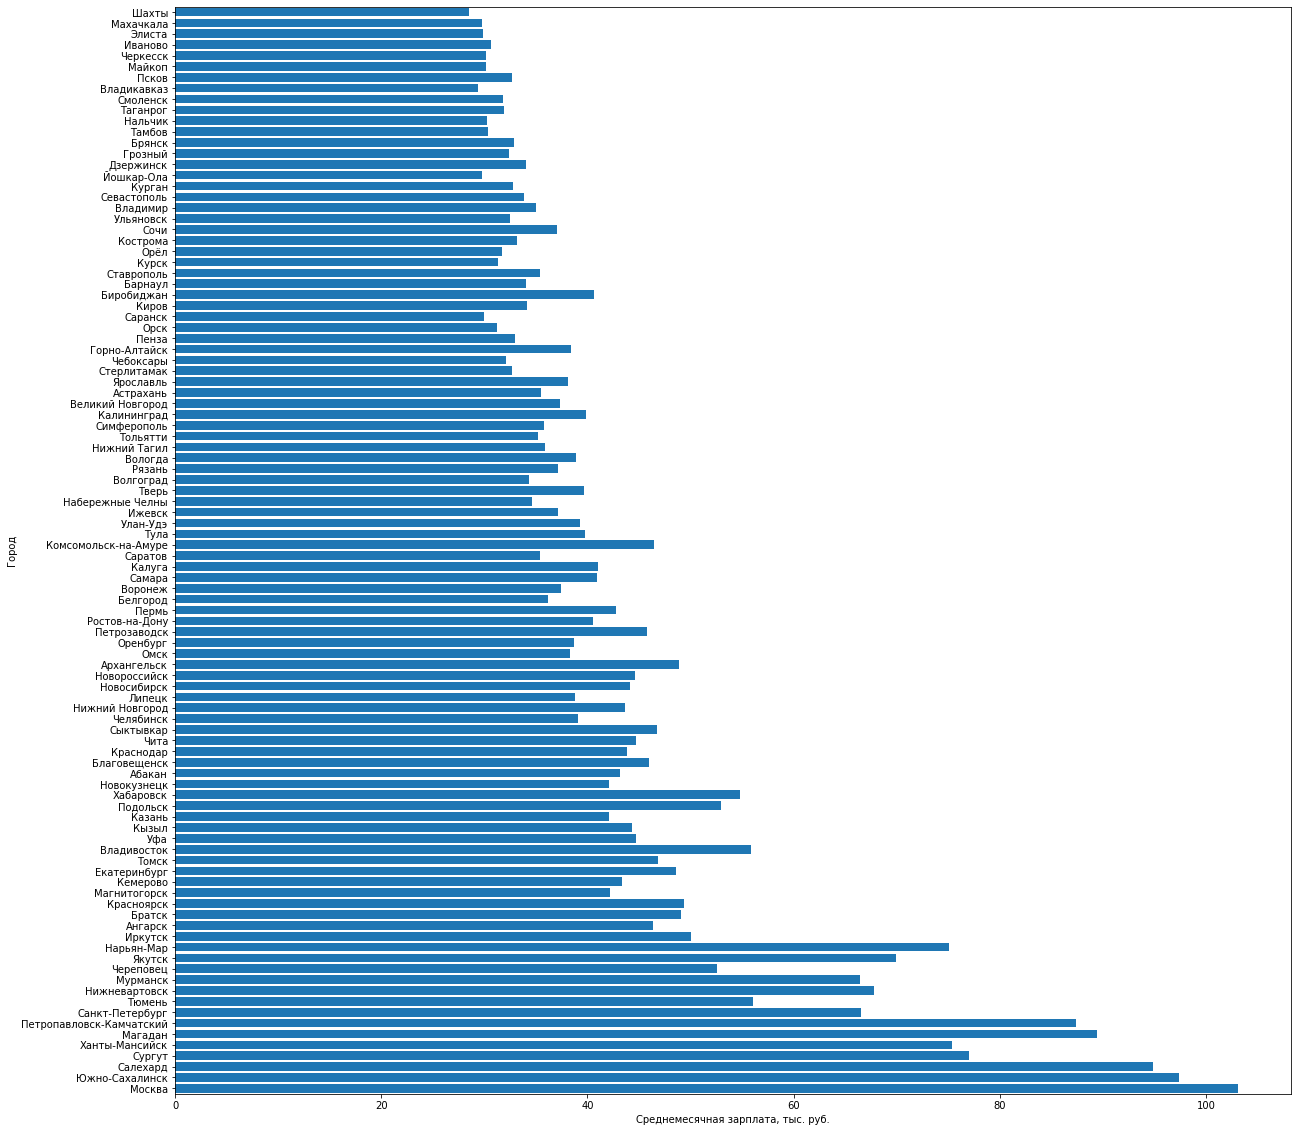

In [6]:
counts = pd.Series(df.Среднемесячная,df.Место)
counts.plot(kind='barh', fontsize=10, figsize=(20, 20))
plt.barh(df.Место, df.Среднемесячная)
plt.ylabel('Город')
plt.xlabel('Среднемесячная зарплата, тыс. руб.')
plt.show()